In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:25,  4.61it/s]                                                        


Epoch 1 of 100
Generator loss: 18.83250128, Discriminator loss: 0.29520292


118it [00:25,  4.58it/s]                                                        


Epoch 2 of 100
Generator loss: 14.85598504, Discriminator loss: 0.00019092


118it [00:26,  4.43it/s]                                                        


Epoch 3 of 100
Generator loss: 13.69148338, Discriminator loss: 0.00005425


118it [00:25,  4.56it/s]                                                        


Epoch 4 of 100
Generator loss: 14.75736210, Discriminator loss: 0.00003278


118it [00:25,  4.64it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


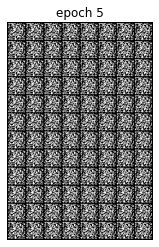

Epoch 5 of 100
Generator loss: 15.03406184, Discriminator loss: 0.00002664


118it [00:25,  4.60it/s]                                                        


Epoch 6 of 100
Generator loss: 14.64516693, Discriminator loss: 0.00002619


118it [00:26,  4.47it/s]                                                        


Epoch 7 of 100
Generator loss: 15.02457246, Discriminator loss: 0.00002216


118it [00:25,  4.57it/s]                                                        


Epoch 8 of 100
Generator loss: 24.80821720, Discriminator loss: 0.01425071


118it [00:25,  4.61it/s]                                                        


Epoch 9 of 100
Generator loss: 36.30954645, Discriminator loss: 0.00003107


118it [00:25,  4.59it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


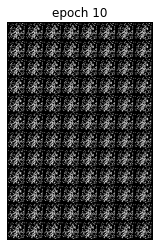

Epoch 10 of 100
Generator loss: 33.13476243, Discriminator loss: 0.00002081


118it [00:25,  4.61it/s]                                                        


Epoch 11 of 100
Generator loss: 31.25885707, Discriminator loss: 0.00001559


118it [00:26,  4.38it/s]                                                        


Epoch 12 of 100
Generator loss: 30.05782964, Discriminator loss: 0.00001289


118it [00:26,  4.51it/s]                                                        


Epoch 13 of 100
Generator loss: 28.80664265, Discriminator loss: 0.00001094


118it [00:26,  4.53it/s]                                                        


Epoch 14 of 100
Generator loss: 27.13770314, Discriminator loss: 0.00000992


118it [00:26,  4.47it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


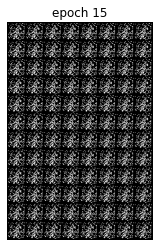

Epoch 15 of 100
Generator loss: 25.67809842, Discriminator loss: 0.00000827


118it [00:27,  4.30it/s]                                                        


Epoch 16 of 100
Generator loss: 25.45753929, Discriminator loss: 0.00000764


118it [00:25,  4.59it/s]                                                        


Epoch 17 of 100
Generator loss: 25.25700018, Discriminator loss: 0.00000691


118it [00:25,  4.62it/s]                                                        


Epoch 18 of 100
Generator loss: 25.09364973, Discriminator loss: 0.00000616


118it [00:26,  4.51it/s]                                                        


Epoch 19 of 100
Generator loss: 24.93369023, Discriminator loss: 0.00000566


118it [00:25,  4.64it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


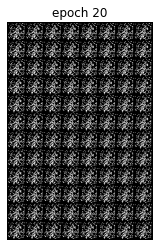

Epoch 20 of 100
Generator loss: 24.78998841, Discriminator loss: 0.00000623


118it [00:25,  4.65it/s]                                                        


Epoch 21 of 100
Generator loss: 24.84689106, Discriminator loss: 0.00000486


118it [00:26,  4.42it/s]                                                        


Epoch 22 of 100
Generator loss: 24.71498533, Discriminator loss: 0.00000453


118it [00:25,  4.65it/s]                                                        


Epoch 23 of 100
Generator loss: 23.75613462, Discriminator loss: 0.00000471


118it [00:25,  4.61it/s]                                                        


Epoch 24 of 100
Generator loss: 23.59264418, Discriminator loss: 0.00000430


118it [00:25,  4.64it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


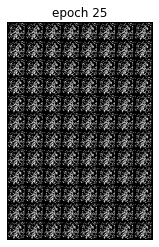

Epoch 25 of 100
Generator loss: 23.65151363, Discriminator loss: 0.00000413


118it [00:25,  4.63it/s]                                                        


Epoch 26 of 100
Generator loss: 23.37086182, Discriminator loss: 0.00000382


118it [00:25,  4.61it/s]                                                        


Epoch 27 of 100
Generator loss: 23.30876605, Discriminator loss: 0.00000644


118it [00:25,  4.58it/s]                                                        


Epoch 28 of 100
Generator loss: 23.58455470, Discriminator loss: 0.00000358


118it [00:27,  4.32it/s]                                                        


Epoch 29 of 100
Generator loss: 23.48208220, Discriminator loss: 0.00000386


118it [00:31,  3.80it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


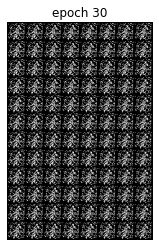

Epoch 30 of 100
Generator loss: 23.16671978, Discriminator loss: 0.00000350


118it [00:41,  2.84it/s]                                                        


Epoch 31 of 100
Generator loss: 22.14386681, Discriminator loss: 0.00000455


118it [00:39,  2.99it/s]                                                        


Epoch 32 of 100
Generator loss: 22.27468243, Discriminator loss: 0.00000404


118it [00:29,  3.99it/s]                                                        


Epoch 33 of 100
Generator loss: 22.97328887, Discriminator loss: 0.00000363


118it [00:56,  2.08it/s]                                                        


Epoch 34 of 100
Generator loss: 23.46281047, Discriminator loss: 0.00000316


118it [00:55,  2.14it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 35 of 100
Generator loss: 23.84889221, Discriminator loss: 0.00000300


118it [00:37,  3.16it/s]                                                        


Epoch 36 of 100
Generator loss: 24.03671240, Discriminator loss: 0.00000269


118it [00:40,  2.90it/s]                                                        


Epoch 37 of 100
Generator loss: 24.01883813, Discriminator loss: 0.00000262


118it [00:36,  3.27it/s]                                                        


Epoch 38 of 100
Generator loss: 24.17006960, Discriminator loss: 0.00000232


118it [00:34,  3.43it/s]                                                        


Epoch 39 of 100
Generator loss: 23.85743713, Discriminator loss: 0.00000222


118it [00:44,  2.63it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


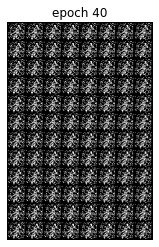

Epoch 40 of 100
Generator loss: 23.94785641, Discriminator loss: 0.00000248


118it [00:37,  3.13it/s]                                                        


Epoch 41 of 100
Generator loss: 23.03167165, Discriminator loss: 0.00000242


118it [00:40,  2.92it/s]                                                        


Epoch 42 of 100
Generator loss: 22.08777012, Discriminator loss: 0.00000322


118it [00:40,  2.92it/s]                                                        


Epoch 43 of 100
Generator loss: 23.31353137, Discriminator loss: 0.00000250


118it [00:27,  4.35it/s]                                                        


Epoch 44 of 100
Generator loss: 24.13272240, Discriminator loss: 0.00000207


118it [00:26,  4.46it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


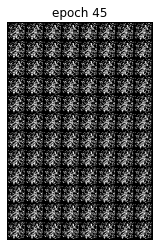

Epoch 45 of 100
Generator loss: 24.83026866, Discriminator loss: 0.00000238


118it [00:26,  4.40it/s]                                                        


Epoch 46 of 100
Generator loss: 25.52216249, Discriminator loss: 0.00000171


118it [00:28,  4.09it/s]                                                        


Epoch 47 of 100
Generator loss: 25.69076052, Discriminator loss: 0.00000148


118it [00:28,  4.21it/s]                                                        


Epoch 48 of 100
Generator loss: 25.30302732, Discriminator loss: 0.00000147


118it [00:27,  4.24it/s]                                                        


Epoch 49 of 100
Generator loss: 25.67087648, Discriminator loss: 0.00000127


118it [00:27,  4.31it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 50 of 100
Generator loss: 25.96923769, Discriminator loss: 0.00000127


118it [00:27,  4.23it/s]                                                        


Epoch 51 of 100
Generator loss: 26.23915573, Discriminator loss: 0.00000123


118it [00:26,  4.40it/s]                                                        


Epoch 52 of 100
Generator loss: 26.66374387, Discriminator loss: 0.00000095


118it [00:27,  4.25it/s]                                                        


Epoch 53 of 100
Generator loss: 26.76386602, Discriminator loss: 0.00000092


118it [00:26,  4.38it/s]                                                        


Epoch 54 of 100
Generator loss: 26.96557257, Discriminator loss: 0.00000084


118it [00:25,  4.65it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 55 of 100
Generator loss: 27.05661819, Discriminator loss: 0.00000076


118it [00:25,  4.68it/s]                                                        


Epoch 56 of 100
Generator loss: 27.18181276, Discriminator loss: 0.00000071


118it [00:25,  4.57it/s]                                                        


Epoch 57 of 100
Generator loss: 27.21606134, Discriminator loss: 0.00000065


118it [00:24,  4.72it/s]                                                        


Epoch 58 of 100
Generator loss: 27.45788820, Discriminator loss: 0.00000066


118it [00:25,  4.59it/s]                                                        


Epoch 59 of 100
Generator loss: 27.65550749, Discriminator loss: 0.00000061


118it [00:29,  4.02it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


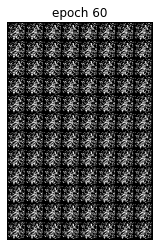

Epoch 60 of 100
Generator loss: 27.97022968, Discriminator loss: 0.00000058


118it [00:25,  4.65it/s]                                                        


Epoch 61 of 100
Generator loss: 28.13258582, Discriminator loss: 0.00000055


118it [00:25,  4.61it/s]                                                        


Epoch 62 of 100
Generator loss: 28.40509245, Discriminator loss: 0.00000050


118it [00:25,  4.63it/s]                                                        


Epoch 63 of 100
Generator loss: 28.61483532, Discriminator loss: 0.00000047


118it [00:25,  4.56it/s]                                                        


Epoch 64 of 100
Generator loss: 28.64388503, Discriminator loss: 0.00000040


118it [00:25,  4.64it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 65 of 100
Generator loss: 28.72464451, Discriminator loss: 0.00000037


118it [00:25,  4.62it/s]                                                        


Epoch 66 of 100
Generator loss: 28.79339062, Discriminator loss: 0.00000035


118it [00:25,  4.64it/s]                                                        


Epoch 67 of 100
Generator loss: 28.95784958, Discriminator loss: 0.00000031


118it [00:25,  4.66it/s]                                                        


Epoch 68 of 100
Generator loss: 28.91498246, Discriminator loss: 0.00000031


118it [00:25,  4.63it/s]                                                        


Epoch 69 of 100
Generator loss: 29.06248924, Discriminator loss: 0.00000031


118it [00:25,  4.66it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


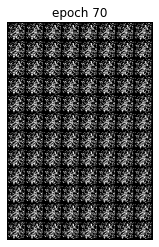

Epoch 70 of 100
Generator loss: 29.12089781, Discriminator loss: 0.00000026


118it [00:25,  4.62it/s]                                                        


Epoch 71 of 100
Generator loss: 29.21157557, Discriminator loss: 0.00000029


118it [00:25,  4.54it/s]                                                        


Epoch 72 of 100
Generator loss: 29.73038836, Discriminator loss: 0.00000024


118it [00:25,  4.59it/s]                                                        


Epoch 73 of 100
Generator loss: 29.79829772, Discriminator loss: 0.00000023


118it [00:25,  4.55it/s]                                                        


Epoch 74 of 100
Generator loss: 29.94335856, Discriminator loss: 0.00000021


118it [00:26,  4.47it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 75 of 100
Generator loss: 30.22842916, Discriminator loss: 0.00000022


118it [00:25,  4.57it/s]                                                        


Epoch 76 of 100
Generator loss: 30.42140506, Discriminator loss: 0.00000020


118it [00:26,  4.48it/s]                                                        


Epoch 77 of 100
Generator loss: 30.49116806, Discriminator loss: 0.00000018


118it [00:26,  4.51it/s]                                                        


Epoch 78 of 100
Generator loss: 30.60134190, Discriminator loss: 0.00000018


118it [00:27,  4.33it/s]                                                        


Epoch 79 of 100
Generator loss: 30.75695674, Discriminator loss: 0.00000015


118it [00:26,  4.49it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


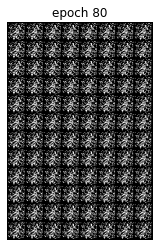

Epoch 80 of 100
Generator loss: 30.82165399, Discriminator loss: 0.00000014


118it [00:26,  4.50it/s]                                                        


Epoch 81 of 100
Generator loss: 30.79612391, Discriminator loss: 0.00000014


118it [00:27,  4.34it/s]                                                        


Epoch 82 of 100
Generator loss: 30.93787886, Discriminator loss: 0.00000013


118it [00:28,  4.11it/s]                                                        


Epoch 83 of 100
Generator loss: 30.97076167, Discriminator loss: 0.00000013


118it [00:27,  4.36it/s]                                                        


Epoch 84 of 100
Generator loss: 31.18282771, Discriminator loss: 0.00000011


118it [00:26,  4.48it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


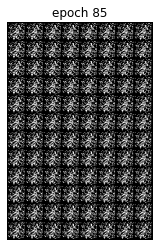

Epoch 85 of 100
Generator loss: 31.24091595, Discriminator loss: 0.00000011


118it [00:26,  4.52it/s]                                                        


Epoch 86 of 100
Generator loss: 31.49937313, Discriminator loss: 0.00000011


118it [00:26,  4.49it/s]                                                        


Epoch 87 of 100
Generator loss: 31.58390101, Discriminator loss: 0.00000010


118it [00:26,  4.51it/s]                                                        


Epoch 88 of 100
Generator loss: 31.74006663, Discriminator loss: 0.00000008


118it [00:26,  4.46it/s]                                                        


Epoch 89 of 100
Generator loss: 31.73214864, Discriminator loss: 0.00000008


118it [00:26,  4.46it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


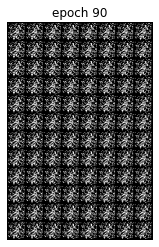

Epoch 90 of 100
Generator loss: 31.80886298, Discriminator loss: 0.00000008


118it [00:26,  4.50it/s]                                                        


Epoch 91 of 100
Generator loss: 31.97386730, Discriminator loss: 0.00000007


118it [00:25,  4.55it/s]                                                        


Epoch 92 of 100
Generator loss: 32.27225547, Discriminator loss: 0.00000007


118it [00:26,  4.47it/s]                                                        


Epoch 93 of 100
Generator loss: 32.41850457, Discriminator loss: 0.00000007


118it [00:26,  4.41it/s]                                                        


Epoch 94 of 100
Generator loss: 32.78717465, Discriminator loss: 0.00000007


118it [00:26,  4.47it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


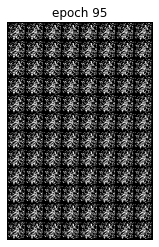

Epoch 95 of 100
Generator loss: 32.99085599, Discriminator loss: 0.00000006


118it [00:26,  4.46it/s]                                                        


Epoch 96 of 100
Generator loss: 33.04868095, Discriminator loss: 0.00000006


118it [00:26,  4.50it/s]                                                        


Epoch 97 of 100
Generator loss: 33.28692588, Discriminator loss: 0.00000005


118it [00:26,  4.49it/s]                                                        


Epoch 98 of 100
Generator loss: 33.44078240, Discriminator loss: 0.00000005


118it [00:26,  4.51it/s]                                                        


Epoch 99 of 100
Generator loss: 33.59800609, Discriminator loss: 0.00000004


118it [00:26,  4.45it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


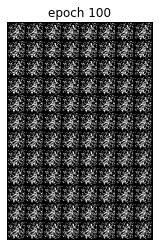

Epoch 100 of 100
Generator loss: 33.64197964, Discriminator loss: 0.00000004


In [20]:
torch.manual_seed(7777)

def generator_loss(output):
    ############ YOUR CODE HERE ##########
    true_labels = torch.ones_like(output)
    loss = criterion(output,true_labels)
    return loss
    
    
    ######################################
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output,true_label)
    
    
    ######################################
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        real_images,_=data
        batch_size = real_images.size(0)
        real_images = real_images.to(device)
        noise = create_noise(batch_size, nz)
        fake_images = generator(noise)
        real_output = discriminator(real_images)
        fake_output = discriminator(fake_images.detach())
        real_labels = label_real(batch_size).to(device)
        fake_labels = label_fake(batch_size).to(device)
        all_outputs = torch.cat((real_output, fake_output), dim=0)
        all_labels = torch.cat((real_labels, fake_labels), dim=0)
        d_loss = discriminator_loss(all_outputs, all_labels)
        optim_d.zero_grad()
        d_loss.backward()
        optim_d.step()

        noise = create_noise(batch_size, nz)
        fake_images = generator(noise)
        output = discriminator(fake_images)
        g_loss = generator_loss(output)
        optim_g.zero_grad()
        g_loss.backward()
        optim_g.step()
        

        loss_g+= g_loss.item()
        loss_d+= d_loss.item()
                            
        ######################################
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [21]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [22]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

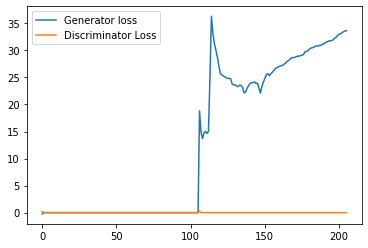

In [23]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')